In [1]:
from seagul.envs.classic_control.planar_quadcopter import PlanarQuadCopter
import matplotlib.pyplot as plt
import numpy as np
import gym
%load_ext autoreload
%autoreload 2

/home/sgillen/work/seagul/seagul/envs/__init__.py:56: UserWarning: Warning, pybullet envs not installed
  warnings.warn("Warning, pybullet envs not installed")
/home/sgillen/work/seagul/seagul/envs/__init__.py:150: UserWarning: Warning, rllib environments not registered
  warnings.warn("Warning, rllib environments not registered")


In [2]:
env = gym.make('planar_quad-v0')

In [3]:
env.reset()

array([0., 0., 0., 0., 0., 0.])

-34.97913382033182


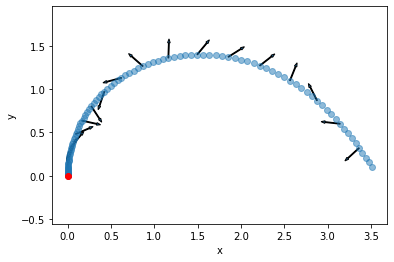

In [4]:
obs = []
rew = []
env.reset()
for i in range(100):
    o,r,_,_ = env.step([50,-3])
    obs.append(o)
    rew.append(r)

obs = np.array(obs)
print(sum(rew))
plt.figure()
env.plot_episode(obs)

In [8]:
from seagul.rl.ars import ARSAgent
agent = ARSAgent('planar_quad-v0',seed=0,n_workers=8)

In [9]:
agent.learn(500);

0 : mean return: -522849.13357067533, top_return: -248051.12878454468, fps:52856.68677683333
10 : mean return: -403915.0108114054, top_return: -366182.34159442154, fps:55087.107190946735
20 : mean return: -344966.59302479285, top_return: -294699.15497880976, fps:57426.5154184862
30 : mean return: -251450.44918040832, top_return: -208504.49031458874, fps:47023.52427652722
40 : mean return: -186035.62311543422, top_return: -147549.76496513697, fps:47744.405608704816
50 : mean return: -133337.64546972534, top_return: -88022.25901572952, fps:54823.241260593924
60 : mean return: -93296.46750578014, top_return: -56572.89083041441, fps:61310.60214399181
70 : mean return: -67921.21178755046, top_return: -19575.18083122853, fps:54076.37628240863
80 : mean return: -41686.81287518833, top_return: -11656.572042666363, fps:50116.49378672654
90 : mean return: -19116.37178295922, top_return: -1144.7828732459518, fps:54980.17436995208
100 : mean return: -10304.876757913338, top_return: -452.8073678917

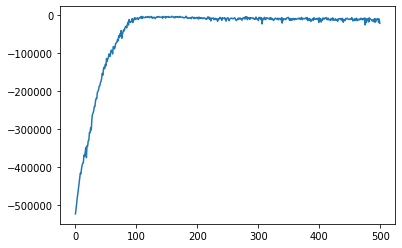

In [10]:
plt.plot(agent.lr_hist)

In [14]:
def do_rollout(env, policy):
    state_list = []
    act_list = []
    reward_list = []

    obs = env.reset()
    done = False
    while not done:
        state_list.append(np.copy(obs))

        actions,_,_,_ = policy.step(obs)
        obs, reward, done, _ = env.step(actions)

        act_list.append(np.array(actions))
        reward_list.append(reward)


    state_arr = np.stack(state_list)
    act_arr = np.stack(act_list)
    reward_arr = np.array(reward_list)
    

    return state_arr, act_arr, reward_arr


In [15]:
o,a,r = do_rollout(env, agent.model)

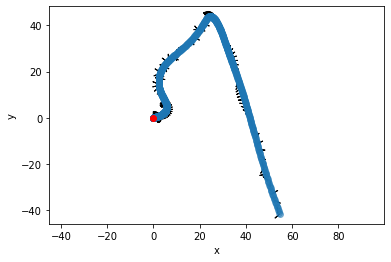

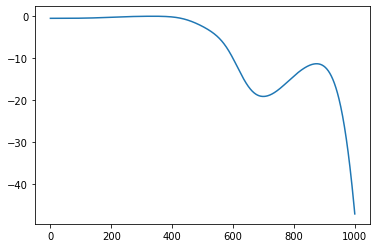

In [17]:
env.plot_episode(o)
plt.figure()
plt.plot(r)

In [26]:
from seagul.rl.sac import SACAgent, SACModel
from seagul.nn import MLP
env_name = 'planar_quad-v0'

input_size = env.observation_space.shape[0]
output_size = env.action_space.shape[0]
layer_size = 64
num_layers = 2

model = SACModel(
     policy = MLP(input_size, output_size*2, num_layers, layer_size),
     value_fn= MLP(input_size, 1, num_layers, layer_size),
     q1_fn = MLP(input_size+output_size, 1, num_layers, layer_size),
     q2_fn = MLP(input_size+output_size, 1, num_layers, layer_size),
     act_limit=env.L
)

agent = SACAgent(env_name=env_name, model=model, seed=int(0), exploration_steps=5000,
     min_steps_per_update=1, reward_stop=3000, gamma=1, sgd_batch_size=64,
     replay_batch_size=256, iters_per_update=1, env_max_steps=250,
     polyak=.995)


In [29]:
agent.learn(2e6);

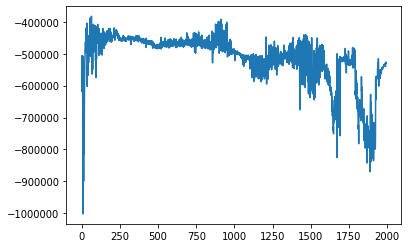

In [30]:
plt.plot(agent.raw_rew_hist)

In [19]:
A = np.identity(5)
x = np.ones((5,1))*5

In [23]:
x**2

array([[25.],
       [25.],
       [25.],
       [25.],
       [25.]])